# MNIST Handwritten Digits

based on Kaggle model (Apache 2.0 open source license)
https://www.kaggle.com/code/scaomath/simple-neural-network-for-mnist-numpy-from-scratch

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
%matplotlib inline

In [2]:
# read the data
train_data = pd.read_csv("MNIST/mnist_train.csv")
test_data = pd.read_csv("MNIST/mnist_test.csv")

In [15]:
# test / train split
y_train = train_data["label"].values
X_train = train_data.drop(columns=["label"]).values/255
y_test = test_data["label"].values
X_test = test_data.drop(columns=["label"]).values/255

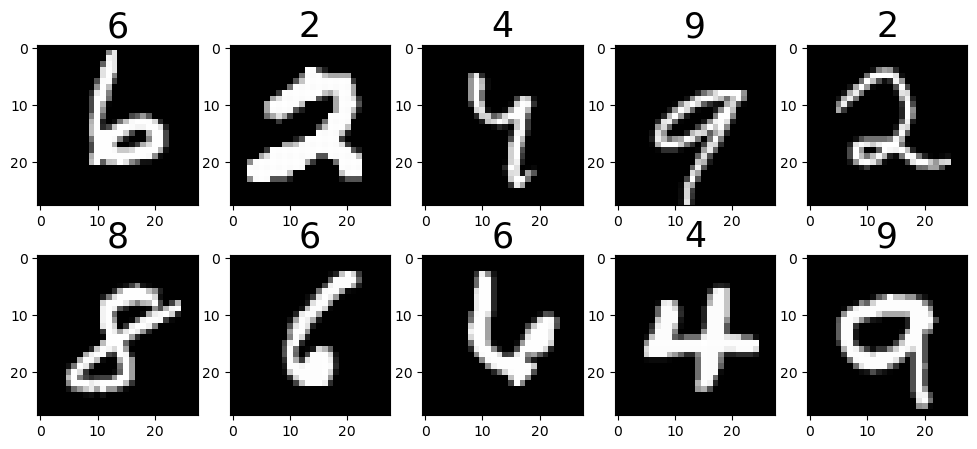

In [4]:
# view some images
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
ax = ax.flatten()
idx = np.random.randint(0, 42000, size=10)

for i in range (10):
    ax[i].imshow(X_train[idx[i],:].reshape(28,28), cmap="gray")
    ax[i].set_title(str(int(y_train[idx[i]])), color="black", fontsize=25)

plt.show()

<h3 align="center">$ReLU(x) = \max(0,x)$</h3> 

In [5]:
# ReLU activation function
def ReLU(x):
    x[x<0]=0
    return x

## ReLU  activation, prediction, and the loss function:

<h3 align="center">\begin{equation}
P(y=k|a;W^{(1)})=\sigma_k(a;W^{(1)}) := \frac{\exp(\theta_k^\top a)}{\sum_{j=1}^{K} exp(\theta_j^\top a)}
\end{equation}</h3> 

In [6]:
def h(X, W, b):
    """
    Hypothesis function: simple FNN with 1 hidden layer
    Layer 1: input
    Layer 2: hidden layer, with a size implied by the arguments W[0], b
    Layer 3: output layer, with a size implied by the arguments W[1]
    """
    
    # layer 1 = input layer
    a1 = X
    
    # layer 1 (input layer) -> layer 2 (hidden layer)
    z1 = np.matmul(a1, W[0]) + b[0]
    
    # layer 2 activation
    a2 = ReLU(z1)
    
    # layer 2 (hidden layer) -> layer 3 (output layer)
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    
    # the output is the probability for each sample
    return sigma

<h3 align="center">$J_i := J(W,b;x^{(i)},y^{(i)}) := -\sum_{k=1}^{K} 1_{\{y^{(i)}=k\}}\log P(y^{(i)}=k|a^{(i)};W^{(1)})$</h3> 

<h3 align="center">$L(W,b;X,y) = \frac{1}{N} \sum_{i=1}^{N} J_i + \frac{\alpha}{2}(||W^{(0)}||^2 + ||W^{(1)}||^2)$</h3> 

In [8]:
def loss(y_pred,y_true):
    '''
    Loss function: cross entropy with an L^2 regularization
    y_true: ground truth, of shape (N,)
    y_pred: prediction made by the model, of shape (N, K) 
    N: number of samples in the batch
    K: global variable, number of classes
    '''
    
    global K
    K = 10
    N = len(y_true)
    
    # loss_sample stores the cross entropy for each sample in X
    # convert y_true from labels to one-hot-vector encoding
    
    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot_vec).sum(axis=1)
    
    # loss_sample is a dimension (N,) array
    # for the final loss, we need take the average
    return -np.mean(loss_sample)

## Backpropagation (Chain rule):

<h3 align="center">$a=(a_1,\dots,a_2)\quad \sigma=(\sigma_1,\dots,\sigma_k)$</h3> 

<h3 align="center">$W^{(1)}=(\theta_1,...,\theta_K)$</h3> 

<h3 align="center">$z^{(2)} = (z^{(2)}_1, \dots, z^{(2)}_K) = (W^{(1)})^\top a = (\theta_1^\top a, \dots, \theta_K^\top a)$</h3> 

<h3 align="center">$\delta^{(2)}_k := \frac{\partial J}{\partial z^{(2)}_k} = \{P(y=k|a;W(1)) - 1_{\{ y=k \}}\} = \sigma_k - 1_{\{ y=k \}}$</h3> 

<h3 align="center">$\frac{\partial J}{\partial \theta_k} = \frac{\partial J}{\partial z^{(2)}_k} \frac{\partial z^{(2)}_k}{\partial \theta_k} = \delta^{(2)}_k a
$</h3> 

<h3 align="center">$W^{(0)}=(w_1,\dots,w_{n_{2}})\quad b=(b_1,\dots,b_{n_{2}})$</h3> 

<h3 align="center">$z^{(1)} = (z^{(1)}_1, \dots, z^{(1)}_{n_2}) = (W^{(0)})^\top x + b = (w_1^\top x + b_1, \dots, w_{n_2}^\top x + b_{n_2})
$</h3> 

<h3 align="center">$\delta^{(1)}_i:=\dfrac{\partial J}{\partial z^{(1)}_i}=\dfrac{\partial J}{\partial a_i}\cdot\dfrac{\partial a_i}{\partial z^{(1)}_i}=\frac{\partial J}{\partial z^{(2)}} \cdot \left(\frac{\partial z^{(2)}}{\partial a_i} \cdot \frac{\partial a_i}{\partial z^{(1)}_i} \right)=\left(\sum_{k=1}^K\dfrac{\partial J}{\partial z^{(2)}_k}\cdot\dfrac{\partial z^{(2)}_k}{\partial a_i}\right)f'(z^{(1)}_i)=\left(\sum_{k=1}^Kw_{ki}\delta^{(2)}_k\right)\cdot1_{\{z^{(1)}_i>0\}}$</h3> 

<h3 align="center">$\frac{\partial J}{\partial w_{ji}} = x_j \delta^{(1)}_i, \quad \frac{\partial J}{\partial b_i} = \delta^{(1)}_i, \quad \frac{\partial J}{\partial w_i} = \delta^{(1)}_i x, \quad \frac{\partial J}{\partial b} = \delta^{(1)}.$</h3> 

In [9]:
def backprop(W, b, X, y, alpha=1e-4):
    """
    Step 1: explicit forward pass h(X, W, b)
    Step 2: backpropagation for dW and db
    """
    
    K = 10
    N = X.shape[0]
    
    ### Step 1:
    
    # layer 1 = input layer
    a1 = X
    
    # layer 1 (input layer) -> layer 2 (hidden layer)
    z1 = np.matmul(X, W[0]) + b[0]
    
    # layer 2 activation
    a2 = ReLU(z1)
    
    # layer 2 (hidden layer) -> layer 3 (output layer)
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    
    ### Step 2:
    
    # layer 2 (hidden layer) -> layer 3 (output layer) weights derivative
    y_one_hot_vec = (y[:,np.newaxis] == np.arange(K))
    delta2 = (sigma - y_one_hot_vec)
    grad_W1 = np.matmul(a2.T, delta2)
    
    # layer 1 (input layer) -> layer 2 (hidden layer) weights derivative
    delta1 = np.matmul(delta2, W[1].T)*(z1>0)
    grad_W0 = np.matmul(X.T, delta1)
    
    # no derivative for layer 1
    # the alpha part is the derivative for the regularization
    # regularization = 0.5*alpha*(np.sum(W[1]**2) + np.sum(W[0]**2))
    
    dW = [grad_W0/N + alpha*W[0], grad_W1/N + alpha*W[1]]
    db = [np.mean(delta1, axis=0)]
    
    # dW[0] is W[0]'s derivative, and dW[1] is W[1]'s derivative; similar for db
    
    return dW, db

## Hyper-parameters and network initialization

In [10]:
# hyper-parameters
eta = 5e-1
alpha = 1e-6 # regularization
gamma = 0.99 # RMSprop
eps = 1e-3 # RMSprop
num_iter = 1000 # number of iterations og gradient descent
n_H = 256 # number of neurons in the hidden layer
n = X_train.shape[1] # number of pixels in an image
K = 10 # number of classes

In [11]:
# initialization
np.random.seed(420)
W = [1e-1*np.random.randn(n, n_H), 1e-1*np.random.randn(n_H, K)]
b = [np.random.randn(n_H)]

## Gradien Descent: training of the network

Choose $w_0$, $\eta$, $\gamma$, $\epsilon$, and let $g_{-1}=1$

For $k=0,1,2,\dots,M$

\begin{aligned}
g_k &= \gamma g_{k-1} + (1-\gamma)|\partial_w L(w_k)|^2\
\end{aligned}
$$$$
\begin{aligned}
w_{k+1} &= w_k - \eta \frac{\partial_w L(w_k)}{\sqrt{g_k+\epsilon}}
\end{aligned}

In [12]:
%%time

gW0 = gW1 = gb0 = 1

for i in range(num_iter):
    dW, db = backprop(W, b, X_train, y_train, alpha)
    
    gW0 = gamma*gW0 + (1-gamma)*np.sum(dW[0]**2)
    etaW0 = eta/np.sqrt(gW0 + eps)
    W[0] -= etaW0 * dW[0]
    
    gW1 = gamma*gW1 + (1-gamma)*np.sum(dW[1]**2)
    etaW1 = eta/np.sqrt(gW1 + eps)
    W[1] -= etaW1 * dW[1]
    
    gb0 = gamma*gb0 + (1-gamma)*np.sum(dW[1]**2)
    etab0 = eta/np.sqrt(gb0 + eps)
    b[0] -= etab0 * db[0]
    
    if i % 500 == 0:
        # sanity check 1
        y_pred = h(X_train,W,b)
        print("Cross-entropy loss after", i+1, "iterations is {:.8}".format(
              loss(y_pred,y_train)))
        print("Training accuracy after", i+1, "iterations is {:.4%}".format( 
              np.mean(np.argmax(y_pred, axis=1)== y_train)))
        
        # sanity check 2
        print("gW0={:.4f} gW1={:.4f} gb0={:.4f}\netaW0={:.4f} etaW1={:.4f} etab0={:.4f}"
              .format(gW0, gW1, gb0, etaW0, etaW1, etab0))
        
        # sanity check 3
        print("|dW0|={:.5f} |dW1|={:.5f} |db0|={:.5f}"
             .format(np.linalg.norm(dW[0]), np.linalg.norm(dW[1]), np.linalg.norm(db[0])), "\n")
        
        # reset RMSprop
        gW0 = gW1 = gb0 = 1

y_pred_final = h(X_train,W,b)
print("Final cross-entropy loss is {:.8}".format(loss(y_pred_final,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final, axis=1)== y_train)))

Cross-entropy loss after 1 iterations is 6.674772
Training accuracy after 1 iterations is 17.7333%
gW0=1.0585 gW1=1.2191 gb0=1.2191
etaW0=0.4858 etaW1=0.4527 etab0=0.4527
|dW0|=2.61759 |dW1|=4.78660 |db0|=0.37840 

Cross-entropy loss after 501 iterations is 0.13162476
Training accuracy after 501 iterations is 96.2283%
gW0=0.2238 gW1=0.0758 gb0=0.0758
etaW0=1.0544 etaW1=1.8042 etab0=1.8042
|dW0|=0.05403 |dW1|=0.02092 |db0|=0.00732 

Final cross-entropy loss is 0.055530785
Final training accuracy is 98.4000%
CPU times: total: 1h 48min 38s
Wall time: 32min 49s


In [32]:
# predictions
y_preds = h(X_test,W,b)
accuracy = np.mean(np.argmax(y_preds, axis=1) == y_test)
print(f"{accuracy*100:.2f}%")

97.35%


In [37]:
# incorrect samples
y_pred_labels = np.argmax(y_preds, axis=1)
incorrect_indices = np.where(y_pred_labels != y_test)[0]
incorrect_samples = X_test[incorrect_indices]
print(f"There are {incorrect_samples.shape[0]} incorrect samples")

There are 265 incorrect samples


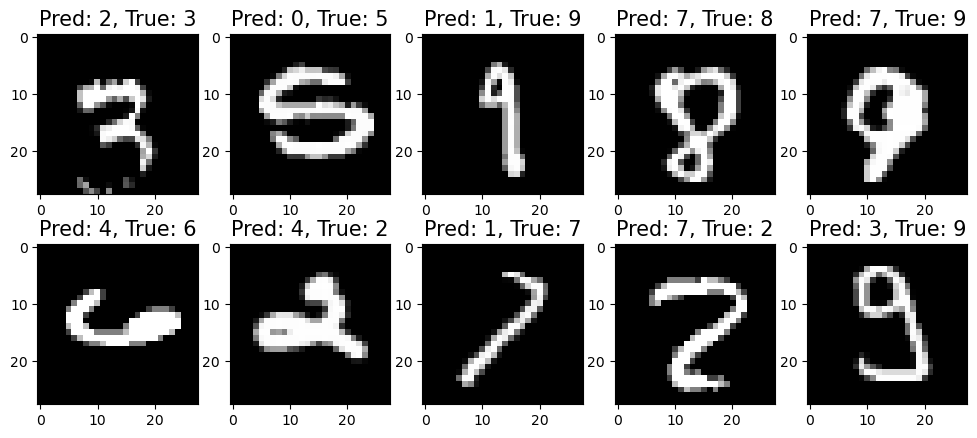

In [38]:
# view some incorrect samples
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
ax = ax.flatten()
idx = np.random.choice(len(incorrect_samples), size=10, replace=False)

for i in range(10):
    ax[i].imshow(incorrect_samples[idx[i]].reshape(28, 28), cmap="gray")
    ax[i].set_title("Pred: %d, True: %d" % (y_pred_labels[incorrect_indices[idx[i]]], y_test[incorrect_indices[idx[i]]]), color="black", fontsize=15)

plt.show()

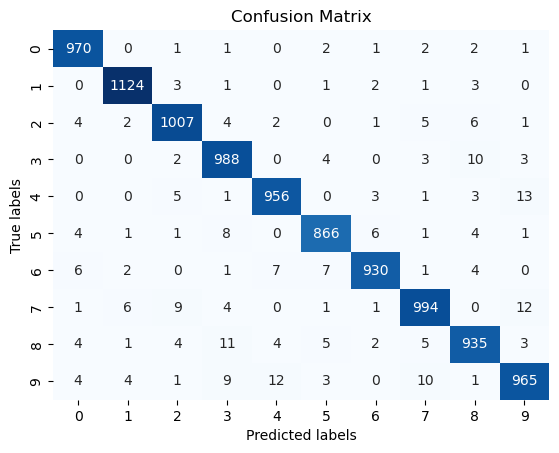

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()